# Classificação simples de imagens

Mediremos o valor de circularidade de uma base de imagens e encontraremos, de forma visual, o valor que melhor separa duas classes de imagens.

É importante notar que existem inúmeros métodos de aprendizado de máquina que podem ser utilizados para encontrarmos de forma sistemática e automática o melhor valor de separação. Mas nosso objetivo no momento é apenas fazer uma análise visual.

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import contorno      # Código do notebook Extração de contorno 
                     # paramétrico, salvo como um arquivo .py

In [2]:
def get_area(img):
    '''Calcula a área do objeto contido em img'''
    
    return np.sum(img)

def get_perimeter(contour):
    '''Calcula o perímetro do objeto representado pelo contorno
       paramétrico contour'''
    
    arc_length = 0
    for point_index in range(len(contour)-1):
        curr_point = contour[point_index]
        next_point = contour[point_index+1]
        distance = np.sqrt((curr_point[0]-next_point[0])**2 + (curr_point[1]-next_point[1])**2)
        arc_length += distance
    curr_point = contour[-1]
    next_point = contour[0]
    distance = np.sqrt((curr_point[0]-next_point[0])**2 + (curr_point[1]-next_point[1])**2)    
    arc_length += distance    
        
    return arc_length

def get_circularity(img):
    
    area = get_area(img)
    cont = contorno.image_contour(img)
    perimeter = get_perimeter(cont)
    
    circularity = 4*np.pi*area/perimeter**2
    
    return circularity

# 1. Encontra separação

Vamos encontrar, de forma visual, o valor de circularidade que melhor separa os dois objetos

### 1.1 Obtenção da circularidade

In [3]:
input_folder = 'imagens/imagens_conhecidas/'
files = os.listdir(input_folder)    # Lista todos os arquivos no diretório input_folder
num_files = len(files)

apples_circularity = []
hearts_circularity = []
for file_index, file in enumerate(files):
    img = plt.imread(input_folder+file)
    img = img>0
    
    # Se a imagem possuir 3 dimensões, é porque ela não possui apenas
    # 1 canal. Nesse caso, mantemos apenas o primeiro canal
    if img.ndim==3:
        img = img[:,:,0]
        
    # É útil aplicarmos abertura em cada imagem para eliminar
    # o galho das imagens de maçã
    img_opened = ndi.binary_opening(img, iterations=20)
    
    circularity = get_circularity(img_opened)
    
    if 'apple' in file:
        apples_circularity.append(circularity)
    elif 'heart' in file:
        hearts_circularity.append(circularity)

In [4]:
print(apples_circularity)
print(hearts_circularity)

[0.9047492712795089, 0.9016950732230449, 0.8768005270544664, 0.8945304655891131, 0.8972321636652305, 0.9095610638263559, 0.8951687217063444, 0.891963413761499, 0.8955273914615255, 0.8815725016307453, 0.8907096436638827, 0.8905556693983726, 0.8897680479570943, 0.8899079496981472, 0.8166144402002152]
[0.6238391536363828, 0.5777741341704432, 0.5900779389545067, 0.6157916570511682, 0.5305012668680407, 0.5006078332123205, 0.46586754645751555, 0.682017963052322, 0.6976106400969869, 0.7347801238430819, 0.5987660380406917, 0.6217778293012992, 0.5996012193454248, 0.6305374367464116, 0.6290087806499792]


### 1.2 Cálculo do histograma da circularidade para cada classe

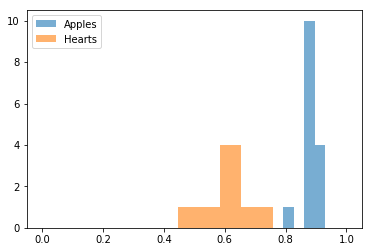

In [5]:
bins = np.linspace(0, 1, 30)
plt.hist(apples_circularity, bins, alpha=0.6)
plt.hist(hearts_circularity, bins, alpha=0.6)
plt.legend(('Apples', 'Hearts'))

Vemos que uma circularidade de 0.77 parece ser um bom valor de separação.

# 2. Classificação

Faremos a leitura das imagens possuindo classes desconhecidas e associaremos a maçã ou coração dependendo do valor de circularidade

In [6]:
circ_threshold = 0.77

input_folder = 'imagens/imagens_desconhecidas/'
files = os.listdir(input_folder)
num_files = len(files)

apples_circularity = []
hearts_circularity = []
apples_imgs = []
hearts_imgs = []
for file_index, file in enumerate(files):
    img = plt.imread(input_folder+file)
    img = img>0
    if img.ndim==3:
        img = img[:,:,0]
        
    img_opened = ndi.binary_opening(img, iterations=20)
    
    circularity = get_circularity(img_opened)
    
    if circularity>circ_threshold:
        apples_circularity.append(circularity)
        apples_imgs.append(img)
    else:
        hearts_circularity.append(circularity)
        hearts_imgs.append(img)
        

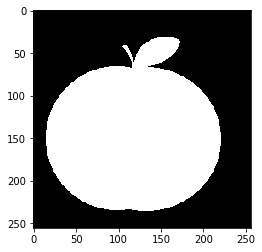

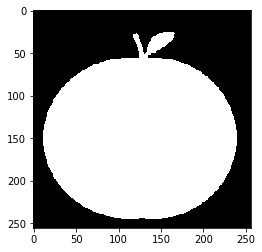

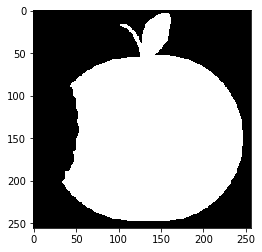

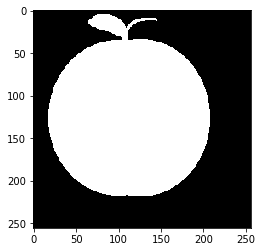

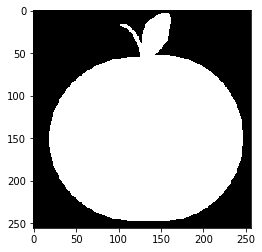

In [7]:
for img in apples_imgs:
    plt.figure()
    plt.imshow(img, 'gray')

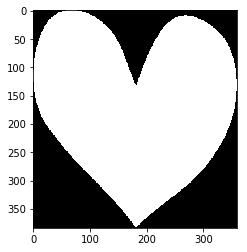

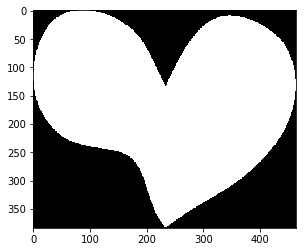

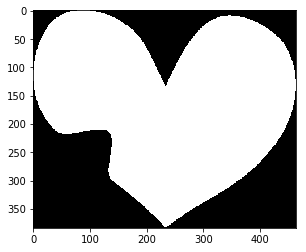

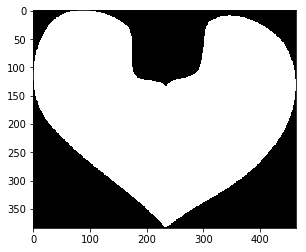

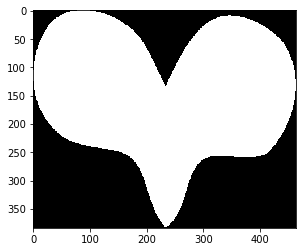

In [8]:
for img in hearts_imgs:
    plt.figure()
    plt.imshow(img, 'gray')